In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import pickle
from itertools import chain
import collections
import nltk

'''try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
'''
nltk.download()
nltk.download('wordnet')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
import matplotlib.pyplot as plt

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Layla\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Layla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#read the data set 
Movie_Review_Data = pd.read_csv("polarityReview.csv")
print(Movie_Review_Data.head(5))

  polarity                                             review
0      neg  ['plot : two teen couples go to a church party...
1      neg  ["the happy bastard's quick movie review \n", ...
2      neg  ['it is movies like these that make a jaded mo...
3      neg  [' " quest for camelot " is warner bros . \' f...
4      neg  ["synopsis : a mentally unstable man undergoin...


In [5]:
#pre processing steps: lower case,remove stop words,tokenization and lemmatization ",
Movie_Review_Data['review']=Movie_Review_Data['review'].astype(str)
Movie_Review_Data['review'] = Movie_Review_Data['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

stop = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')
Movie_Review_Data['review'] = Movie_Review_Data['review'].apply(lambda x: " ".join(x for x in x.split() if x not in stop ))
Movie_Review_Data['review'] = Movie_Review_Data['review'].apply(lambda x: " ".join(tokenizer.tokenize(x)))
#pre-processing lemmatization
lemmatizer=WordNetLemmatizer()
Movie_Review_Data['review'] =Movie_Review_Data['review'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))


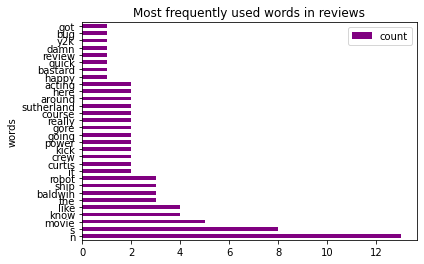

In [6]:
#for ploting
str=""
str=Movie_Review_Data['review'][1]
tokens=str.split()
#for ploting the count
count_no=collections.Counter(tokens)
reviews=pd.DataFrame(count_no.most_common(30),columns=['words','count'])
#fig,ax=plt.subplot(figsize=(12,8))
reviews.sort_values(by='count')
ax=reviews.plot.barh(x='words',y='count',color="purple")
ax.set_title("Most frequently used words in reviews")
plt.show()

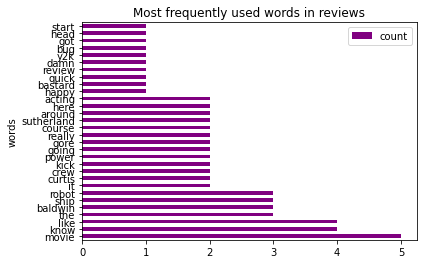

In [7]:
#edit after the plot
n_s={'n','s'}
Movie_Review_Data['review'] = Movie_Review_Data['review'].apply(lambda x: " ".join(x for x in x.split() if x not in n_s ))
str=Movie_Review_Data['review'][1]
tokens=str.split()
count_no=collections.Counter(tokens)
reviews=pd.DataFrame(count_no.most_common(30),columns=['words','count'])
#fig,ax=plt.subplot(figsize=(12,8))
reviews.sort_values(by='count')
ax=reviews.plot.barh(x='words',y='count',color="purple")
ax.set_title("Most frequently used words in reviews")
plt.show()

In [8]:
#shuffle Date
Movie_Review_Data_shuffled=Movie_Review_Data.sample(frac=1).reset_index()
print(Movie_Review_Data_shuffled.head(5))

   index polarity                                             review
0    307      neg  this adaptation h g well acclaimed novel the i...
1    689      neg  in first death wish movie mild mannered new yo...
2     63      neg  would believe real life mean julia robert ugly...
3   1790      pos  tempe mill cinema az this movie u non stop sti...
4    853      neg  it shame execution concept fall short premise ...


In [9]:
#train test split 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(Movie_Review_Data_shuffled['review'], Movie_Review_Data_shuffled['polarity'],test_size=0.20,shuffle=True)


In [10]:
# TFIDF feature generation
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(Movie_Review_Data['review'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)
xtrain_tfidf.data

array([0.08694822, 0.01856616, 0.02400166, ..., 0.07087668, 0.12175232,
       0.04125424])

In [11]:
#train model
def train_model(classifier, feature_vector_train, label, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

    f = open('my_classifier.pickle', 'wb')
    pickle.dump(classifier, f)
    f.close()


In [12]:
#load Model and prediction
def loadTheModel(validX):
    f = open('my_classifier.pickle', 'rb')
    classifier = pickle.load(f)
    f.close()
    # predict the labels on validation dataset
    predictions = classifier.predict(validX)
    return predictions, metrics.accuracy_score(predictions, valid_y)

In [16]:
# Linear Classification "
train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y)
predictionList,accuracy=loadTheModel(xvalid_tfidf)
print ("Accuracy: ", accuracy)

Accuracy:  0.8025


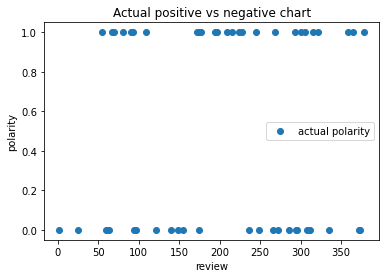

In [14]:
valid_x = encoder.fit_transform(valid_x)
plt.scatter(valid_x[0:50],valid_y[0:50],label = "actual polarity")
plt.title('Actual positive vs negative chart')
plt.xlabel('review')
plt.ylabel('polarity')
plt.legend()
plt.show()

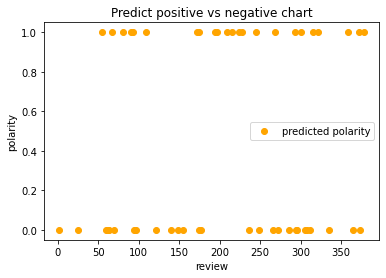

In [15]:
plt.scatter(valid_x[0:50],predictionList[0:50],label = "predicted polarity",c="orange")
plt.title('Predict positive vs negative chart')
plt.xlabel('review')
plt.ylabel('polarity')
plt.legend()
plt.show()

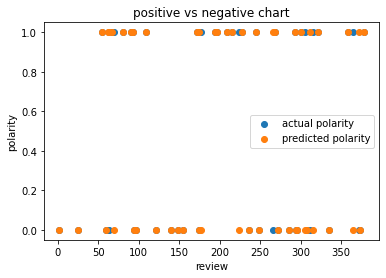

In [17]:
plt.scatter(valid_x[0:50],valid_y[0:50],label = "actual polarity")
plt.scatter(valid_x[0:50],predictionList[0:50],label = "predicted polarity")
plt.title('positive vs negative chart')
plt.xlabel('review')
plt.ylabel('polarity')
plt.legend()
plt.show()